<a href="https://colab.research.google.com/github/shahrukh-malikk/STAT-7220-Applied-Experimental-Design/blob/Assignment-1/Assignments/HW1/HW-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import os
os.chdir("/content")
!rm -rf STAT-7220-Applied-Experimental-Design
print(os.getcwd())

/content


In [10]:
# === COURSE REPO SETUP === #
import os
# 1. ENTER your GitHub username (the one that owns your fork)
github_username = "shahrukh-malikk"

# 2. Name of the repo (don't change unless your fork name is different)
repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
repo_url = f"https://github.com/{github_username}/{repo_name}.git"




# --- Detect if we're already in a repo ---
cwd = os.getcwd()
if cwd.endswith(repo_name):
    print(f"✅ Already inside repo folder: {cwd}")
else:
    # --- If the repo folder exists, check if it's nested ---
    if os.path.exists(repo_name):
        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
    else:
        print(f"📥 Cloning repo from {repo_url}...")
        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
    if os.path.exists(repo_name):
        os.chdir(repo_name)
        print(f"📂 Changed directory to: {os.getcwd()}")
    else:
        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
remote_url = os.popen("git config --get remote.origin.url").read().strip()

if "abrown9008" in remote_url:
   print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
   print("💡 Please fork the repo to your own account and update `github_username` above.")
else:
    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

today_dir = "Assignments/HW1"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")

✅ Already inside repo folder: /content/STAT-7220-Applied-Experimental-Design
🔗 Connected to fork at: https://github.com/shahrukh-malikk/STAT-7220-Applied-Experimental-Design.git
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Assignments/HW1


# Homework 1: Completely Randomized Designs
## Dr. Austin R. Brown
### School of Data Science & Analytics
### Kennesaw State University

**DUE: September 12, 2025**

**INSTRUCTIONS:** You are a quality control analyst for a craft brewery experimenting with a new India Pale Ale (IPA). One key quality attribute of IPA is its bitterness, measured in International Bitterness Units (IBUs). The brewery wants to determine if the aging time (3, 4, or 5 weeks) affects the IBUs of the beer. To test this, the brewing team brews a single batch of the experimental IPA and divides it into aging tanks, with each tank randomly assigned to be aged for 3, 4, or 5 weeks. After aging, the IBUs of ten randomly selected bottles from each aging time are measured using a spectrophotometer. The data are in the file `IPA.xlsx`. With these data, I want you to:

**Question 1.** Briefly define the objective of this experiment.

**Answer.**
The objective of this experiment is to test whether different aging times (3, 4, or 5 weeks) produce significant differences in the mean bitterness (IBUs) of the new IPA

**Question 2.** Specify the outcome variable

**Answer.**
bitterness of the IPA, measured in International Bitterness Units (IBUs).

**Question 3.** Specify the independent variable. What are some possible lurking variables?

**Answer.**
The independent variable in this experiment is the aging time of the beer, which has three levels: 3, 4, and 5 weeks. This is the factor being tested to see if it affects the bitterness. Some possible lurking variables that could influence the results include differences in tank temperature, light exposure, or oxygen levels during aging. Other factors like measurement error, slight ingredient inconsistencies, or variation between bottles could also play a role. These need to be controlled so that any changes in bitterness can be linked mainly to the aging time.



**Question 4.** Briefly explain why a completely randomized design is appropriate for this experiment.

**Answer.**
A completely randomized design is appropriate because all bottles come from the same batch, making them similar. Randomly assigning them to different aging times ensures that any differences in bitterness are due to aging, not other factors.




**Question 5.** State the null and alternative hypotheses for this experiment.

**Answer.**
Null Hypothesis (H₀): Aging time (3, 4, or 5 weeks) has no effect on the IPA's bitterness (IBUs).
Alternative Hypothesis (H₁): Aging time affects the IPA's bitterness (IBUs) at least one aging time results in a different average IBU.




**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?







In [16]:
# Import pandas
import pandas as pd

# Load the data from the Excel file
ipa_data = pd.read_excel("IPA.xlsx")
print(ipa_data.head())
#Summary of the provided data
print(ipa_data.describe())

##Summary group by weeks
summary_by_weeks = ipa_data.groupby("Weeks")["IBU"].agg( mean='mean', median='median', std='std', min='min', max='max', count='count' )
print(summary_by_weeks)

     Weeks    IBU
0  3 Weeks  51.71
1  3 Weeks  43.53
2  3 Weeks  47.25
3  3 Weeks  41.57
4  3 Weeks  46.27
             IBU
count  30.000000
mean   59.204000
std    14.518316
min    39.040000
25%    46.515000
50%    58.655000
75%    65.795000
max    90.320000
           mean  median        std    min    max  count
Weeks                                                  
3 Weeks  45.657  44.255   5.548563  39.04  57.75     10
4 Weeks  60.164  60.940  10.390411  44.56  81.99     10
5 Weeks  71.791  71.465  12.627946  48.93  90.32     10


/tmp/ipython-input-2708564679.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Weeks', y='IBU', data=ipa_data, palette=green_palette)


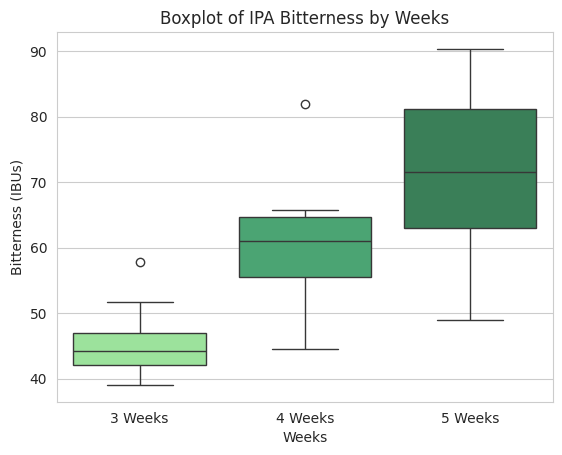

In [19]:

import seaborn as sns
import matplotlib.pyplot as plt
green_palette = ["#90EE90", "#3CB371", "#2E8B57"]
sns.set_style("whitegrid")
sns.boxplot(x='Weeks', y='IBU', data=ipa_data, palette=green_palette)
plt.title("Boxplot of IPA Bitterness by Weeks")
plt.xlabel("Weeks")
plt.ylabel("Bitterness (IBUs)")
plt.show()


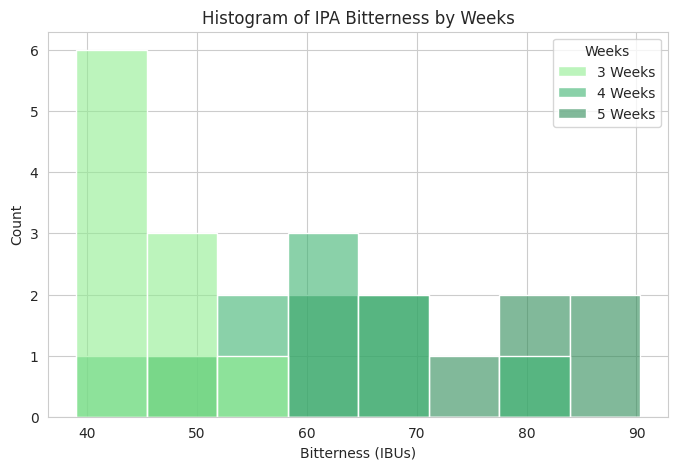

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.histplot(data=ipa_data, x="IBU", hue="Weeks", palette=["#90EE90", "#3CB371", "#2E8B57"], bins=8, kde=False, alpha=0.6)
plt.title("Histogram of IPA Bitterness by Weeks")
plt.xlabel("Bitterness (IBUs)")
plt.ylabel("Count")
plt.show()


**Question 7.** Build a one-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?



**Answer.**
We ran a one-way ANOVA to see if aging time affects IPA bitterness. Checking the residuals with a Q-Q plot and the Shapiro-Wilk test showed they are approximately normal. Both methods support the normality assumption, so it's appropriate to continue with the ANOVA analysis.
**conclusion:** The residuals are approximately normal, so ANOVA assumptions are satisfied.


--- ANOVA Table ---
              sum_sq    df          F    PR(>F)
C(Weeks)  3428.75378   2.0  17.246546  0.000015
Residual  2683.90994  27.0        NaN       NaN
Shapiro-Wilk Test:
Statistic = 0.9877, p-value = 0.9734


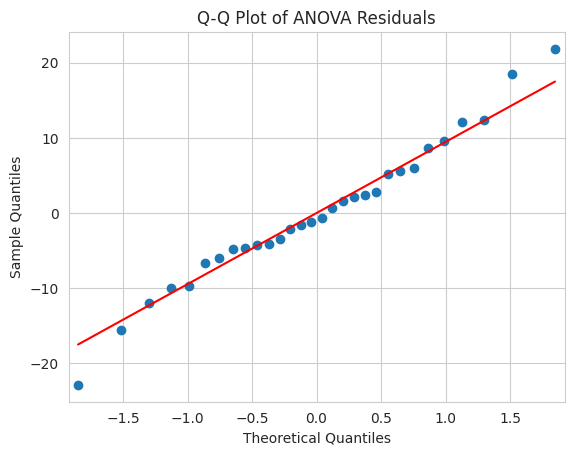

In [39]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


model = ols('IBU ~ C(Weeks)', data=ipa_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("--- ANOVA Table ---")
print(anova_table)

# shapiro_test
shapiro_test = stats.shapiro(model.resid)
print("Shapiro-Wilk Test:")
print(f"Statistic = {shapiro_test.statistic:.4f}, p-value = {shapiro_test.pvalue:.4f}")

# Q-Q plot
sm.qqplot(model.resid, line='s')
plt.title("Q-Q Plot of ANOVA Residuals")
plt.show()



**Question 8.** Test the assumption of homogeneity of variance using **both** a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?



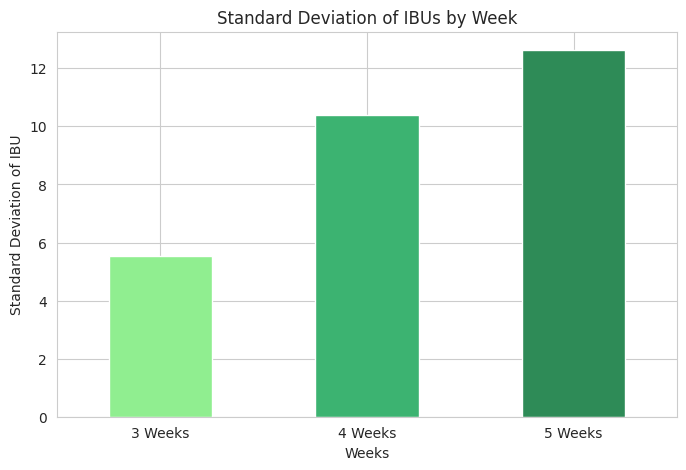



--- Statistical Test ---
Levene's Test Statistic: 3.1377
P-value: 0.0595


In [48]:
# Import necessary library
from scipy.stats import levene
import matplotlib.pyplot as plt

# Define the colors for each bar
colors = ["#90EE90", "#3CB371", "#2E8B57"]  # LightGreen, MediumSeaGreen, SeaGreen

# Plot the bar chart with the specified colors
summary_by_weeks['std'].plot(kind='bar', figsize=(8,5), color=colors)
plt.title('Standard Deviation of IBUs by Week')
plt.xlabel('Weeks')
plt.ylabel('Standard Deviation of IBU')
plt.xticks(rotation=0)
plt.show()
print("\n")


# --- 2. Statistical Test: Levene's Test ---
# Separate IBU values by group
group_3_weeks = ipa_data[ipa_data['Weeks']=='3 Weeks']['IBU']
group_4_weeks = ipa_data[ipa_data['Weeks']=='4 Weeks']['IBU']
group_5_weeks = ipa_data[ipa_data['Weeks']=='5 Weeks']['IBU']

# Perform Levene's test
levene_test = levene(group_3_weeks, group_4_weeks, group_5_weeks)
print("--- Statistical Test ---")
print(f"Levene's Test Statistic: {levene_test.statistic:.4f}")
print(f"P-value: {levene_test.pvalue:.4f}")


**Answer:**

Yes, The assumption of equal variance appears to be satisfied, though the results are borderline. The bar plot showed that variability increased slightly from 3 to 5 weeks. Levene’s test gave a statistic of 3.1377 and a p-value of 0.0595. Since the p-value is above 0.05, we do not reject the null hypothesis. Overall, the data reasonably meets the assumption of homogeneity of variance.


**Question 9.** Report the F-statistic and its associated p-value from the one-way ANOVA model. Which of our two hypotheses is more strongly supported? Why?



In [49]:
import statsmodels.api as sm

# We already fit our model in Question 7 and saved it as the variable 'model'
# Create and display the ANOVA results table
anova_table = sm.stats.anova_lm(model, typ=2)

print("--- One-Way ANOVA Results ---")
print(anova_table)


--- One-Way ANOVA Results ---
              sum_sq    df          F    PR(>F)
C(Weeks)  3428.75378   2.0  17.246546  0.000015
Residual  2683.90994  27.0        NaN       NaN


**Answer:**

The one-way ANOVA resulted in an F-statistic of 17.25 with an associated p-value of 0.000015. Because the p-value is far below the 0.05 significance level, we reject the null hypothesis of equal means. This provides strong evidence that at least one aging time leads to a significantly different average bitterness (IBU). Therefore, the alternative hypothesis is supported.

**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which aging times are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.



In [50]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_results = pairwise_tukeyhsd(
    endog=ipa_data['IBU'],
    groups=ipa_data['Weeks'],
    alpha=0.05
)

print(tukey_results)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
3 Weeks 4 Weeks   14.507 0.0083  3.4518 25.5622   True
3 Weeks 5 Weeks   26.134    0.0 15.0788 37.1892   True
4 Weeks 5 Weeks   11.627 0.0378  0.5718 22.6822   True
------------------------------------------------------


**Answer:**
Tukey’s HSD test showed significant differences in bitterness between all aging times. Each step from 3 to 4 weeks and 4 to 5 weeks led to a clear increase in IBU.

**Question 11.** Write a brief, contextual conclusion summarizing the results of your analyses.

**Answer:**
This experiment tested whether aging time (3, 4, or 5 weeks) affects the bitterness (IBU) of a new IPA. The assumptions of ANOVA were reasonably met: residuals were normally distributed (Shapiro-Wilk p = 0.973), and variances were homogeneous though borderline (Levene's test statistic = 3.1377, p = 0.0595). The one-way ANOVA showed a significant effect of aging time on bitterness (F = 17.25, p = 0.000015). Tukey's HSD confirmed that each group differed significantly, with bitterness consistently increasing as aging time increased.